# Caml API Usage

In [1]:
import os
import sys

os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

df_backend = "pandas"

## Create Synthetic Data Using DoWhy

In [2]:
from dowhy.datasets import linear_dataset

data = linear_dataset(
    beta=10,
    num_common_causes=10,
    num_samples=1000,
    num_effect_modifiers=10,
    num_treatments=2,
)

df = data["df"]
df["uuid"] = df.index
data

{'df':            X0        X1        X2        X3        X4        X5        X6  \
 0   -0.001126  0.775545 -1.925045  1.741436  1.586310  1.516852  0.567402   
 1   -0.301554  0.180549  0.501834  1.140146  0.982878  0.202105  1.523678   
 2   -0.169415  1.643076 -0.740782  3.325151 -0.181024 -0.751698  1.035375   
 3   -0.903509 -0.067447 -0.244920  1.487713 -0.228234 -0.533676 -1.634891   
 4    0.117630 -2.388349 -1.095126  0.740243  0.580074 -0.660721 -0.133576   
 ..        ...       ...       ...       ...       ...       ...       ...   
 995 -1.207018  0.485864 -0.899185  1.534188  2.046753  0.121139  0.992743   
 996 -0.627306 -0.137829 -0.537284 -0.163950  0.688632  1.559780  0.657065   
 997 -1.115978  0.377871 -0.653933 -0.099178 -0.902052 -0.311297 -0.815171   
 998 -1.898987  0.273279 -0.927665  1.088802 -0.628299 -0.074156 -0.104150   
 999 -0.600229 -0.316126 -1.038847  0.931788  2.362660  1.114861 -0.287393   
 
            X7        X8        X9  ...        W4       

In [3]:
import polars as pl

try:
    from pyspark.sql import SparkSession
except ImportError:
    pass

if df_backend == "polars":
    df = pl.from_pandas(df)
    spark = None
elif df_backend == "pandas":
    spark = None
    pass
elif df_backend == "pyspark":
    spark = (
        SparkSession.builder.master("local[1]")
        .appName("local-tests")
        .config("spark.executor.cores", "1")
        .config("spark.executor.instances", "1")
        .config("spark.sql.shuffle.partitions", "1")
        .getOrCreate()
    )
    df = spark.createDataFrame(df)

In [4]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,W4,W5,W6,W7,W8,W9,v0,v1,y,uuid
0,-0.001126,0.775545,-1.925045,1.741436,1.586310,1.516852,0.567402,0.508865,-0.385263,-0.920575,...,-0.892453,-0.547946,0.670791,-0.575014,0.448462,-0.122608,True,False,11.450592,0
1,-0.301554,0.180549,0.501834,1.140146,0.982878,0.202105,1.523678,0.244116,0.286531,-0.537179,...,-1.477209,-0.422520,0.414921,0.952764,-1.045467,-1.253990,False,False,-11.448591,1
2,-0.169415,1.643076,-0.740782,3.325151,-0.181024,-0.751698,1.035375,-0.708117,-0.414058,-0.868559,...,-0.995512,0.129569,-0.614292,1.724857,-1.455971,0.704657,True,True,8.305726,2
3,-0.903509,-0.067447,-0.244920,1.487713,-0.228234,-0.533676,-1.634891,-0.051137,0.243035,0.382992,...,-2.609603,-0.553214,-1.697554,1.595043,1.743849,-0.696577,True,False,-1.233793,3
4,0.117630,-2.388349,-1.095126,0.740243,0.580074,-0.660721,-0.133576,-0.399191,-0.422067,1.059408,...,0.906197,-0.524494,0.184274,1.518106,1.606261,0.187107,True,True,27.753032,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.207018,0.485864,-0.899185,1.534188,2.046753,0.121139,0.992743,1.603777,2.238242,-0.051498,...,-1.329157,-0.809459,-2.111581,0.283151,0.647014,-1.596094,False,False,-11.158776,995
996,-0.627306,-0.137829,-0.537284,-0.163950,0.688632,1.559780,0.657065,0.524104,0.550554,-2.904744,...,-1.142200,0.405081,0.699153,0.070269,0.369094,0.006127,False,False,-8.069564,996
997,-1.115978,0.377871,-0.653933,-0.099178,-0.902052,-0.311297,-0.815171,-0.337951,-0.092471,-0.651240,...,-0.736667,-0.735758,-0.175835,-1.989117,-0.741724,0.521891,False,False,-16.763076,997
998,-1.898987,0.273279,-0.927665,1.088802,-0.628299,-0.074156,-0.104150,-0.030891,-0.713048,-0.375774,...,-0.636902,-2.273899,-0.147034,1.083408,0.974748,-0.588489,True,True,16.285270,998


## Core API

### CamlCATE

In [5]:
# sys.exit("Pausing notebook here")

#### Class Instantiation

In [6]:
from caml import CamlCATE

caml = CamlCATE(
    df,
    Y="y",
    T="v0",
    X=[c for c in df.columns if "X" in c or "W" in c],
    W=None,
    uuid="uuid",
    discrete_treatment=True,
    discrete_outcome=False,
)

[08/18/24 17:20:24] INFO     Logging has been set up.                                                 ]8;id=136802;file:///home/jakep/projects/caml/caml/logging.py\logging.py]8;;\:]8;id=383311;file:///home/jakep/projects/caml/caml/logging.py#34\34]8;;\

#### Nuissance Function AutoML

In [7]:
caml.find_nuisance_functions(
    automl_Y_kwargs={"time_budget": 5},
    automl_T_kwargs={"time_budget": 5},
    use_ray=False,
)

[flaml.automl.logger: 08-18 17:20:24] {1680} INFO - task = regression
[flaml.automl.logger: 08-18 17:20:24] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-18 17:20:24] {1789} INFO - Minimizing error metric: mse


                    INFO     metafeature distance: 1.3405047688734943                                ]8;id=506971;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=468839;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.7285026815002782                                ]8;id=866264;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=718672;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 1.6011282939436433                                ]8;id=881356;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=209027;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.5349119450067581                                ]8;id=669465;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=445433;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 4.002396189483845                                 ]8;id=532503;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=994218;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.47246460819805364                               ]8;id=139130;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=153290;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

[flaml.automl.logger: 08-18 17:20:24] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostSklearnEstimator'>: []
[flaml.automl.logger: 08-18 17:20:24] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.LGBMEstimator'>: []
[flaml.automl.logger: 08-18 17:20:24] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostLimitDepthEstimator'>: []
[flaml.automl.logger: 08-18 17:20:24] {1901} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-18 17:20:24] {2219} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 08-18 17:20:24] {2345} INFO - Estimated sufficient time budget=3549s. Estimated necessary time budget=16s.
[flaml.automl.logger: 08-18 17:20:24] {2392} INFO 

[08/18/24 17:20:30] INFO     metafeature distance: 1.6724093504200996                                ]8;id=618859;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=511458;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.9100751716809555                                ]8;id=952882;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=358191;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 2.0009027496774756                                ]8;id=724380;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=239085;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.6679302275768876                                ]8;id=138180;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=783113;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 5.0019171582099204                                ]8;id=320208;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=486858;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.5897374670547761                                ]8;id=303551;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=372986;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

[flaml.automl.logger: 08-18 17:20:30] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostSklearnEstimator'>: []
[flaml.automl.logger: 08-18 17:20:30] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.LGBMEstimator'>: []
[flaml.automl.logger: 08-18 17:20:30] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostLimitDepthEstimator'>: []
[flaml.automl.logger: 08-18 17:20:30] {1901} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-18 17:20:30] {2219} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 08-18 17:20:31] {2345} INFO - Estimated sufficient time budget=5874s. Estimated necessary time budget=26s.
[flaml.automl.logger: 08-18 17:20:31] {2392} INFO 

[08/18/24 17:20:36] INFO     metafeature distance: 0.022663391108506396                              ]8;id=34526;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=834156;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.022663391108506396                              ]8;id=139088;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=586397;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.022663391108506396                              ]8;id=40014;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=375483;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.022663391108506396                              ]8;id=976324;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=260872;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.023762040305568676                              ]8;id=178902;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=707331;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

                    INFO     metafeature distance: 0.022663391108506396                              ]8;id=401680;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py\suggest.py]8;;\:]8;id=166933;file:///home/jakep/projects/caml/.pixi/envs/dev-pyspark/lib/python3.10/site-packages/flaml/default/suggest.py#100\100]8;;\

[flaml.automl.logger: 08-18 17:20:36] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.LGBMEstimator'>: []
[flaml.automl.logger: 08-18 17:20:36] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostSklearnEstimator'>: []
[flaml.automl.logger: 08-18 17:20:36] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.ExtraTreesEstimator'>: []
[flaml.automl.logger: 08-18 17:20:36] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostLimitDepthEstimator'>: []
[flaml.automl.logger: 08-18 17:20:36] {1901} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-18 17:20:36] {2219} INFO - iteration 0, current l

#### Fit and ensemble CATE models

In [8]:
caml.fit(
    subset_cate_models=[
        "LinearDML",
        "NonParamDML",
        "DML-Lasso3d",
        "CausalForestDML",
        "XLearner",
        "DomainAdaptationLearner",
        "SLearner",
        "TLearner",
        "DRLearner",
    ]
)

2024-08-18 17:20:43,209	INFO worker.py:1772 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
(fit_model pid=493157) Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+01, tolerance: 8.822e+00
(fit_model pid=493157) Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+01, tolerance: 8.822e+00
(fit_model pid=493157) Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+01, tolerance: 8.822e+00
(fit_model pid=493157) Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.795e+00, tolerance: 9.443e+00
(fit_

[08/18/24 17:21:20] INFO     Ensemble Estimator RScore: 0.1459280831063936                              ]8;id=976307;file:///home/jakep/projects/caml/caml/core/cate.py\cate.py]8;;\:]8;id=770830;file:///home/jakep/projects/caml/caml/core/cate.py#714\714]8;;\

                    INFO     Inidividual Estimator RScores: {'LinearDML': -0.05381173346800305,         ]8;id=933549;file:///home/jakep/projects/caml/caml/core/cate.py\cate.py]8;;\:]8;id=363479;file:///home/jakep/projects/caml/caml/core/cate.py#715\715]8;;\
                             'NonParamDML': -0.0034070313457112977, 'DML-Lasso3d': 0.1459280831063936,             
                             'CausalForestDML': -0.009266812139493874, 'XLearner':                                 
                             -0.018181598228584228, 'DomainAdaptationLearner': -0.00895005195189702,               
                             'SLearner': -0.13907483065666537, 'TLearner': -0.06929563686334839,                   
                             'DRLearner': -0.15854556165145306}                                                    

                    INFO     The best estimator is greater than the ensemble estimator. Returning that  ]8;id=392617;file:///home/jakep/projects/caml/caml/core/cate.py\cate.py]8;;\:]8;id=413654;file:///home/jakep/projects/caml/caml/core/cate.py#722\722]8;;\
                             individual estimator.                                                                 

In [9]:
caml.final_estimator

                    INFO     The best estimator has NOT been fit on the entire dataset. This is         ]8;id=967240;file:///home/jakep/projects/caml/caml/core/_base.py\_base.py]8;;\:]8;id=423445;file:///home/jakep/projects/caml/caml/core/_base.py#45\45]8;;\
                             returning the estimator fit on the training dataset. Please run fit()                 
                             method with final_estimator=True to fit the best estimator on the entire              
                             dataset, once validated.                                                              

#### CATE Validation

In [10]:
validation_results = caml.validate()

In [11]:
validation_results.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,0.389,0.07,0.0,2.051,0.352,0.0,6.514,1.024,0.0,-0.322


<Axes: title={'center': 'Treatment = 1, Calibration R^2 = -0.322'}, xlabel='Group Mean CATE', ylabel='GATE'>

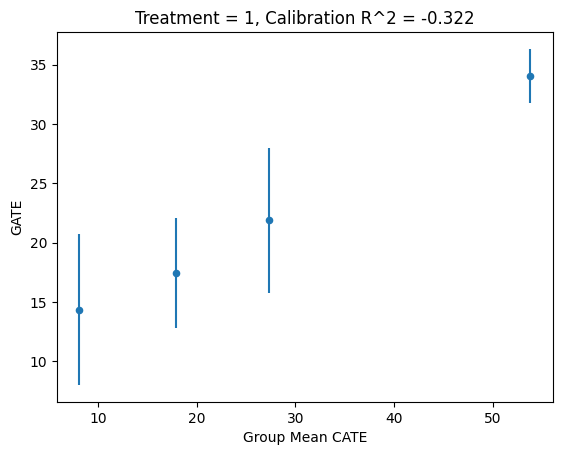

In [12]:
validation_results.plot_cal(1)

<Axes: title={'center': 'Treatment = 1, Integral = 2.051 +/- 0.352'}, xlabel='Percentage treated', ylabel='Gain over Random'>

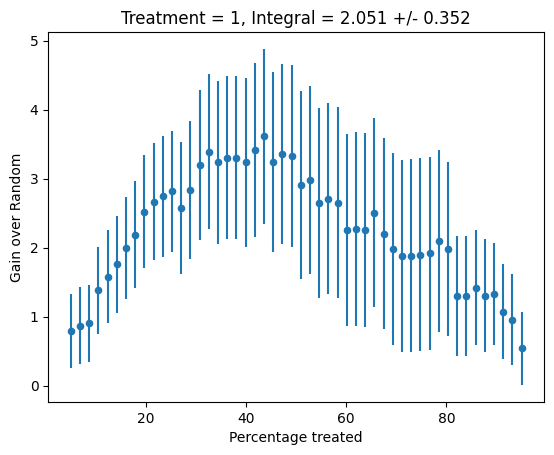

In [13]:
validation_results.plot_qini(1)

<Axes: title={'center': 'Treatment = 1, Integral = 6.514 +/- 1.024'}, xlabel='Percentage treated', ylabel='Gain over Random'>

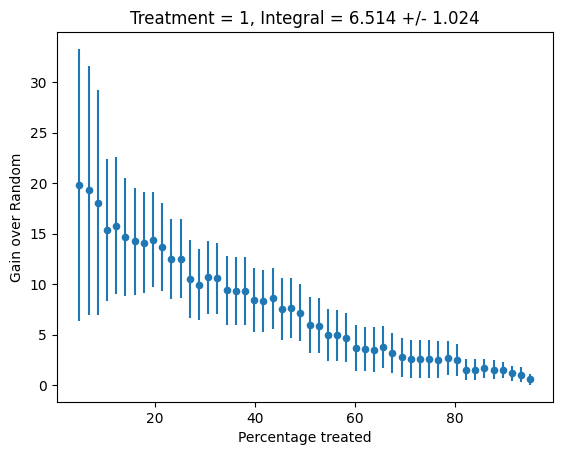

In [14]:
validation_results.plot_toc(1)

#### Refit best estimator on full dataset

In [15]:
caml.fit(final_estimator=True)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+01, tolerance: 1.427e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.505e+01, tolerance: 1.427e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.447e+01, tolerance: 1.427e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.425e+01, tolerance: 1.427e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e+01, tolerance: 1.508e+01
Objective did n

#### Predict CATEs

In [16]:
## "Out of sample" predictions

df_predictions = caml.predict(out_of_sample_df=df, append_predictions=True)

if df_backend == "pyspark":
    from pyspark.sql import functions as f

    df_predictions.select(f.mean("cate_predictions")).show()
else:
    print(df_predictions["cate_predictions"].mean())

26.745599700812576


In [17]:
## Append to internal dataframe

caml.predict(append_predictions=True)

caml.dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,W5,W6,W7,W8,W9,v0,v1,y,uuid,cate_predictions
0,-0.001126,0.775545,-1.925045,1.741436,1.586310,1.516852,0.567402,0.508865,-0.385263,-0.920575,...,-0.547946,0.670791,-0.575014,0.448462,-0.122608,True,False,11.450592,0,24.061033
1,-0.301554,0.180549,0.501834,1.140146,0.982878,0.202105,1.523678,0.244116,0.286531,-0.537179,...,-0.422520,0.414921,0.952764,-1.045467,-1.253990,False,False,-11.448591,1,22.715355
2,-0.169415,1.643076,-0.740782,3.325151,-0.181024,-0.751698,1.035375,-0.708117,-0.414058,-0.868559,...,0.129569,-0.614292,1.724857,-1.455971,0.704657,True,True,8.305726,2,19.490621
3,-0.903509,-0.067447,-0.244920,1.487713,-0.228234,-0.533676,-1.634891,-0.051137,0.243035,0.382992,...,-0.553214,-1.697554,1.595043,1.743849,-0.696577,True,False,-1.233793,3,3.981622
4,0.117630,-2.388349,-1.095126,0.740243,0.580074,-0.660721,-0.133576,-0.399191,-0.422067,1.059408,...,-0.524494,0.184274,1.518106,1.606261,0.187107,True,True,27.753032,4,48.216185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.207018,0.485864,-0.899185,1.534188,2.046753,0.121139,0.992743,1.603777,2.238242,-0.051498,...,-0.809459,-2.111581,0.283151,0.647014,-1.596094,False,False,-11.158776,995,33.651831
996,-0.627306,-0.137829,-0.537284,-0.163950,0.688632,1.559780,0.657065,0.524104,0.550554,-2.904744,...,0.405081,0.699153,0.070269,0.369094,0.006127,False,False,-8.069564,996,26.364533
997,-1.115978,0.377871,-0.653933,-0.099178,-0.902052,-0.311297,-0.815171,-0.337951,-0.092471,-0.651240,...,-0.735758,-0.175835,-1.989117,-0.741724,0.521891,False,False,-16.763076,997,18.147823
998,-1.898987,0.273279,-0.927665,1.088802,-0.628299,-0.074156,-0.104150,-0.030891,-0.713048,-0.375774,...,-2.273899,-0.147034,1.083408,0.974748,-0.588489,True,True,16.285270,998,26.467219


#### CATE Rank Ordering

In [18]:
## "Out of sample" predictions

df_rank_ordered = caml.rank_order(
    out_of_sample_df=df_predictions, append_rank_order=True
)

df_rank_ordered

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,W6,W7,W8,W9,v0,v1,y,uuid,cate_predictions,cate_ranking
0,0.973607,0.193093,-1.518059,-1.438430,1.206739,0.169582,-1.669196,0.196116,1.060342,0.642216,...,0.310214,-0.297454,-0.607623,-1.967579,False,False,-27.550809,127,121.968147,0
1,0.604561,-0.360859,-2.714094,-0.805901,0.830087,-0.194053,-0.828552,0.584901,0.266184,0.861425,...,-1.109074,2.429248,0.748328,-2.494262,False,False,-24.119325,773,110.245460,1
2,0.691376,0.169367,-1.575938,0.617776,0.804373,-0.528851,-1.052064,0.015969,0.387711,-0.064425,...,-2.044200,-1.229860,-1.165775,-1.046665,False,False,-33.265812,829,108.794195,2
3,-0.480197,-1.143515,-3.007389,2.519364,3.684085,-0.427528,1.113131,0.803855,1.479812,0.375221,...,0.055477,-0.539388,-2.674471,-1.899797,False,False,-27.302360,124,108.514177,3
4,-0.959120,-0.584223,2.247411,1.706681,0.365507,-1.056865,1.255009,1.583946,-0.251631,1.048087,...,-1.154454,-1.645131,-1.003567,-0.644326,False,False,-33.147434,699,107.507583,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.034373,-2.086221,0.572115,-1.231889,0.090079,1.293801,0.630682,-0.051319,-0.711144,0.598606,...,0.763446,2.909741,0.535718,-3.469288,False,False,4.756228,253,-17.555796,995
996,0.288017,0.870007,-0.501841,-0.217754,-0.325388,1.920521,1.584007,2.246024,-1.567599,-0.615289,...,-0.448375,0.913944,-0.446125,-2.703561,False,True,13.147036,616,-17.939139,996
997,0.147434,1.332177,-1.360060,0.511457,1.114031,-2.228968,-1.834391,-1.169224,0.342465,-0.005278,...,-0.203981,0.744799,-0.670971,-2.669264,False,False,3.346154,824,-19.307315,997
998,-0.005194,-1.474779,0.382239,-0.124027,0.241754,-1.622776,-0.902655,-0.909548,0.063612,0.768055,...,2.245057,-0.173732,-1.223408,-2.905727,False,True,10.759423,739,-22.758003,998


In [19]:
## Append to internal dataframe

caml.rank_order(append_rank_order=True)

caml.dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,W6,W7,W8,W9,v0,v1,y,uuid,cate_predictions,cate_ranking
0,0.973607,0.193093,-1.518059,-1.438430,1.206739,0.169582,-1.669196,0.196116,1.060342,0.642216,...,0.310214,-0.297454,-0.607623,-1.967579,False,False,-27.550809,127,121.968147,0
1,0.604561,-0.360859,-2.714094,-0.805901,0.830087,-0.194053,-0.828552,0.584901,0.266184,0.861425,...,-1.109074,2.429248,0.748328,-2.494262,False,False,-24.119325,773,110.245460,1
2,0.691376,0.169367,-1.575938,0.617776,0.804373,-0.528851,-1.052064,0.015969,0.387711,-0.064425,...,-2.044200,-1.229860,-1.165775,-1.046665,False,False,-33.265812,829,108.794195,2
3,-0.480197,-1.143515,-3.007389,2.519364,3.684085,-0.427528,1.113131,0.803855,1.479812,0.375221,...,0.055477,-0.539388,-2.674471,-1.899797,False,False,-27.302360,124,108.514177,3
4,-0.959120,-0.584223,2.247411,1.706681,0.365507,-1.056865,1.255009,1.583946,-0.251631,1.048087,...,-1.154454,-1.645131,-1.003567,-0.644326,False,False,-33.147434,699,107.507583,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.034373,-2.086221,0.572115,-1.231889,0.090079,1.293801,0.630682,-0.051319,-0.711144,0.598606,...,0.763446,2.909741,0.535718,-3.469288,False,False,4.756228,253,-17.555796,995
996,0.288017,0.870007,-0.501841,-0.217754,-0.325388,1.920521,1.584007,2.246024,-1.567599,-0.615289,...,-0.448375,0.913944,-0.446125,-2.703561,False,True,13.147036,616,-17.939139,996
997,0.147434,1.332177,-1.360060,0.511457,1.114031,-2.228968,-1.834391,-1.169224,0.342465,-0.005278,...,-0.203981,0.744799,-0.670971,-2.669264,False,False,3.346154,824,-19.307315,997
998,-0.005194,-1.474779,0.382239,-0.124027,0.241754,-1.622776,-0.902655,-0.909548,0.063612,0.768055,...,2.245057,-0.173732,-1.223408,-2.905727,False,True,10.759423,739,-22.758003,998


#### CATE Visualization/Summary

In [20]:
cate_summary = caml.summarize()

cate_summary

,cate_mean,cate_sum,cate_std,cate_min,cate_max,count
0,26.7456,26745.599701,20.244789,-30.365684,121.968147,1000


#### Access my dataframe and estimator object 

In [21]:
caml.dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,W6,W7,W8,W9,v0,v1,y,uuid,cate_predictions,cate_ranking
0,0.973607,0.193093,-1.518059,-1.438430,1.206739,0.169582,-1.669196,0.196116,1.060342,0.642216,...,0.310214,-0.297454,-0.607623,-1.967579,False,False,-27.550809,127,121.968147,0
1,0.604561,-0.360859,-2.714094,-0.805901,0.830087,-0.194053,-0.828552,0.584901,0.266184,0.861425,...,-1.109074,2.429248,0.748328,-2.494262,False,False,-24.119325,773,110.245460,1
2,0.691376,0.169367,-1.575938,0.617776,0.804373,-0.528851,-1.052064,0.015969,0.387711,-0.064425,...,-2.044200,-1.229860,-1.165775,-1.046665,False,False,-33.265812,829,108.794195,2
3,-0.480197,-1.143515,-3.007389,2.519364,3.684085,-0.427528,1.113131,0.803855,1.479812,0.375221,...,0.055477,-0.539388,-2.674471,-1.899797,False,False,-27.302360,124,108.514177,3
4,-0.959120,-0.584223,2.247411,1.706681,0.365507,-1.056865,1.255009,1.583946,-0.251631,1.048087,...,-1.154454,-1.645131,-1.003567,-0.644326,False,False,-33.147434,699,107.507583,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.034373,-2.086221,0.572115,-1.231889,0.090079,1.293801,0.630682,-0.051319,-0.711144,0.598606,...,0.763446,2.909741,0.535718,-3.469288,False,False,4.756228,253,-17.555796,995
996,0.288017,0.870007,-0.501841,-0.217754,-0.325388,1.920521,1.584007,2.246024,-1.567599,-0.615289,...,-0.448375,0.913944,-0.446125,-2.703561,False,True,13.147036,616,-17.939139,996
997,0.147434,1.332177,-1.360060,0.511457,1.114031,-2.228968,-1.834391,-1.169224,0.342465,-0.005278,...,-0.203981,0.744799,-0.670971,-2.669264,False,False,3.346154,824,-19.307315,997
998,-0.005194,-1.474779,0.382239,-0.124027,0.241754,-1.622776,-0.902655,-0.909548,0.063612,0.768055,...,2.245057,-0.173732,-1.223408,-2.905727,False,True,10.759423,739,-22.758003,998


In [22]:
from econml.score import EnsembleCateEstimator

# Use this estimator object as pickled object for optimized inference
final_estimator = caml.final_estimator

if isinstance(final_estimator, EnsembleCateEstimator):
    for model in final_estimator._cate_models:
        print(model)
        print(model._input_names)
else:
    print(final_estimator)
    print(final_estimator._input_names)

[08/18/24 17:23:26] INFO     The best estimator has been fit on the entire dataset and will be          ]8;id=712077;file:///home/jakep/projects/caml/caml/core/_base.py\_base.py]8;;\:]8;id=457325;file:///home/jakep/projects/caml/caml/core/_base.py#40\40]8;;\
                             returned.                                                                             

{'feature_names': ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19'], 'output_names': ['Y0'], 'treatment_names': ['T0_True']}


### CamlDML

In [23]:
sys.exit("Pausing notebook here")

SystemExit: Pausing notebook here

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
from caml import CamlDML

model = CamlDML(
    df,
    Y="y",
    T="v0",
    X=[c for c in df.columns if "X" in c or "W" in c],
    uuid="uuid",
)

In [ ]:
model.fit()

In [ ]:
model.summarize()

In [ ]:
model.predict(append_predictions=True)

In [ ]:
sys.getsizeof(model._ibis_df)